In [ ]:
#!pip install -U scikit-learn

In [ ]:
"""import pandas as pd

df2 = pd.read_csv("/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df1 = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df = pd.concat([df1,df2],axis=0,ignore_index=True)
df"""

import pandas as pd

df = pd.read_csv("/content/ResaleFlatPrice.csv")
df

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
222016,222016,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,63 years 01 month,865000.0
222017,222017,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,63 years 01 month,880000.0
222018,222018,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 03 months,770000.0
222019,222019,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,60 years 02 months,800000.0


In [ ]:
#df.to_csv("ResaleFlatPrice.csv")

In [ ]:
df.isnull().sum()

Unnamed: 0             0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222021 entries, 0 to 222020
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           222021 non-null  int64  
 1   month                222021 non-null  object 
 2   town                 222021 non-null  object 
 3   flat_type            222021 non-null  object 
 4   block                222021 non-null  object 
 5   street_name          222021 non-null  object 
 6   storey_range         222021 non-null  object 
 7   floor_area_sqm       222021 non-null  float64
 8   flat_model           222021 non-null  object 
 9   lease_commence_date  222021 non-null  int64  
 10  remaining_lease      222021 non-null  object 
 11  resale_price         222021 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 20.3+ MB


In [ ]:
len(df.lease_commence_date.unique())

55

In [ ]:
df['remaining_lease'].unique()

array(['70', '65', '64', '63', '62', '69', '60', '61', '86', '77', '80',
       '90', '87', '66', '58', '94', '71', '68', '84', '73', '79', '76',
       '72', '82', '74', '67', '88', '81', '89', '53', '54', '55', '57',
       '93', '83', '85', '92', '91', '59', '95', '52', '51', '56', '75',
       '96', '78', '50', '97', '49', '48', '61 years 04 months',
       '60 years 07 months', '62 years 05 months', '62 years 01 month',
       '63 years', '61 years 06 months', '58 years 04 months',
       '59 years 08 months', '59 years 06 months', '60 years',
       '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', 

In [ ]:
df['remaining_lease'] = df['remaining_lease'].replace({'years':'.','months':'','month':''},regex=True).replace({" . ":'.'," .":""},regex=True)
df['remaining_lease'] = df['remaining_lease'].astype(float)
df.drop(['Unnamed: 0','month','block','street_name','flat_model'],axis=1,inplace=True)
df

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,ANG MO KIO,3 ROOM,07 TO 09,60.0,1986,70.00,255000.0
1,ANG MO KIO,3 ROOM,01 TO 03,68.0,1981,65.00,275000.0
2,ANG MO KIO,3 ROOM,01 TO 03,69.0,1980,64.00,285000.0
3,ANG MO KIO,3 ROOM,01 TO 03,68.0,1979,63.00,290000.0
4,ANG MO KIO,3 ROOM,07 TO 09,68.0,1980,64.00,290000.0
...,...,...,...,...,...,...,...
222016,YISHUN,EXECUTIVE,04 TO 06,146.0,1988,63.01,865000.0
222017,YISHUN,EXECUTIVE,10 TO 12,145.0,1988,63.01,880000.0
222018,YISHUN,EXECUTIVE,01 TO 03,146.0,1985,60.03,770000.0
222019,YISHUN,EXECUTIVE,04 TO 06,146.0,1985,60.02,800000.0


In [ ]:
df['remaining_lease'].unique()

array([70.  , 65.  , 64.  , 63.  , 62.  , 69.  , 60.  , 61.  , 86.  ,
       77.  , 80.  , 90.  , 87.  , 66.  , 58.  , 94.  , 71.  , 68.  ,
       84.  , 73.  , 79.  , 76.  , 72.  , 82.  , 74.  , 67.  , 88.  ,
       81.  , 89.  , 53.  , 54.  , 55.  , 57.  , 93.  , 83.  , 85.  ,
       92.  , 91.  , 59.  , 95.  , 52.  , 51.  , 56.  , 75.  , 96.  ,
       78.  , 50.  , 97.  , 49.  , 48.  , 61.04, 60.07, 62.05, 62.01,
       61.06, 58.04, 59.08, 59.06, 62.08, 60.1 , 59.03, 61.05, 60.04,
       60.03, 63.09, 61.01, 61.1 , 58.06, 59.04, 62.11, 60.08, 93.08,
       93.07, 60.01, 94.08, 78.04, 60.06, 62.06, 70.08, 63.04, 63.06,
       67.07, 61.07, 68.02, 68.03, 67.09, 67.05, 63.07, 66.03, 65.04,
       69.05, 59.11, 60.05, 69.02, 69.03, 68.1 , 62.1 , 64.04, 66.01,
       83.01, 87.11, 71.02, 92.04, 54.06, 78.06, 82.11, 75.04, 66.07,
       66.06, 75.11, 68.04, 55.09, 68.07, 67.11, 69.01, 69.11, 74.06,
       74.04, 69.06, 72.03, 67.02, 66.05, 69.04, 66.11, 66.1 , 69.08,
       66.09, 67.1 ,

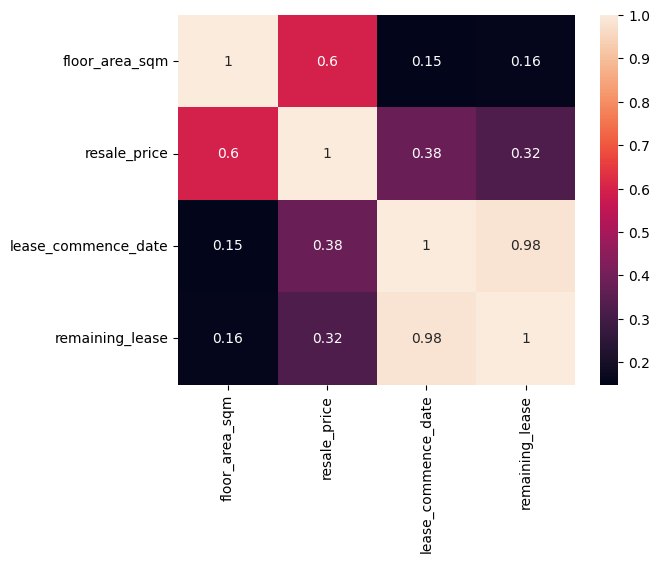

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

c = df[['floor_area_sqm','resale_price','lease_commence_date','remaining_lease']].corr()
sns.heatmap(c,annot=True)
plt.show()

In [ ]:
df.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'lease_commence_date', 'remaining_lease', 'resale_price'],
      dtype='object')

# **Checking Skewness**

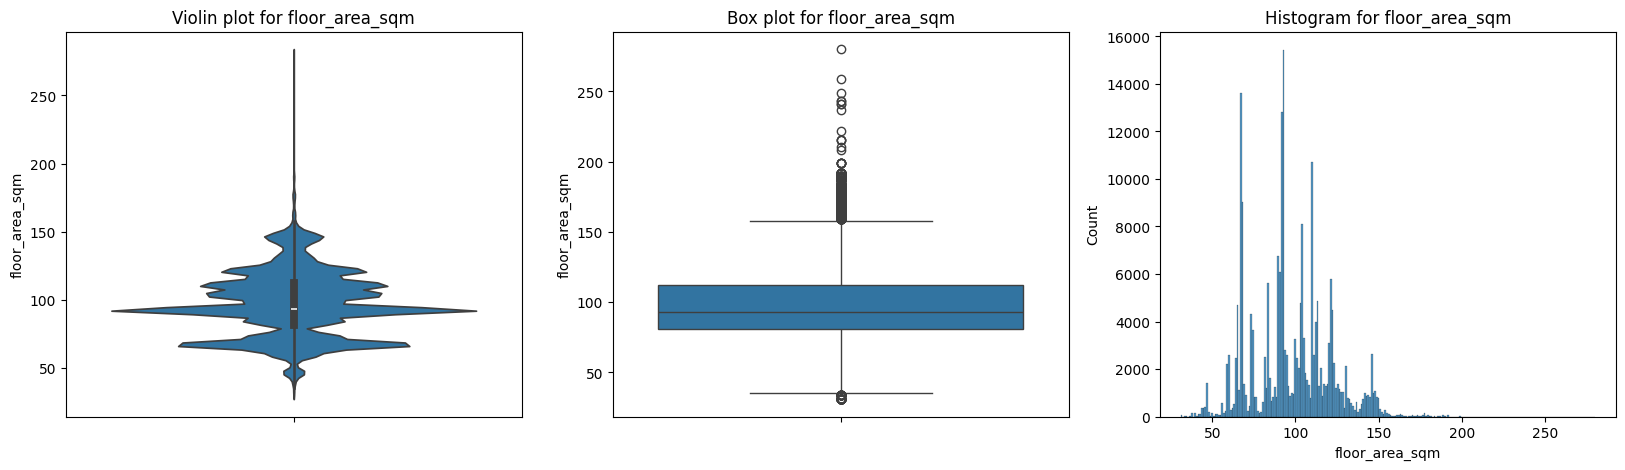

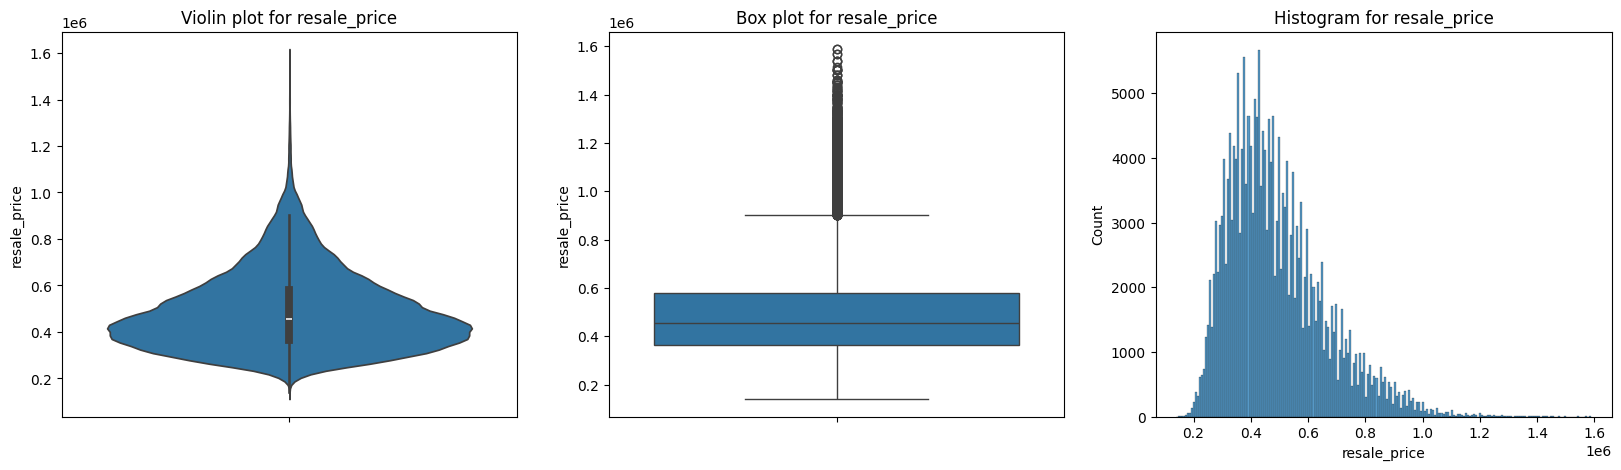

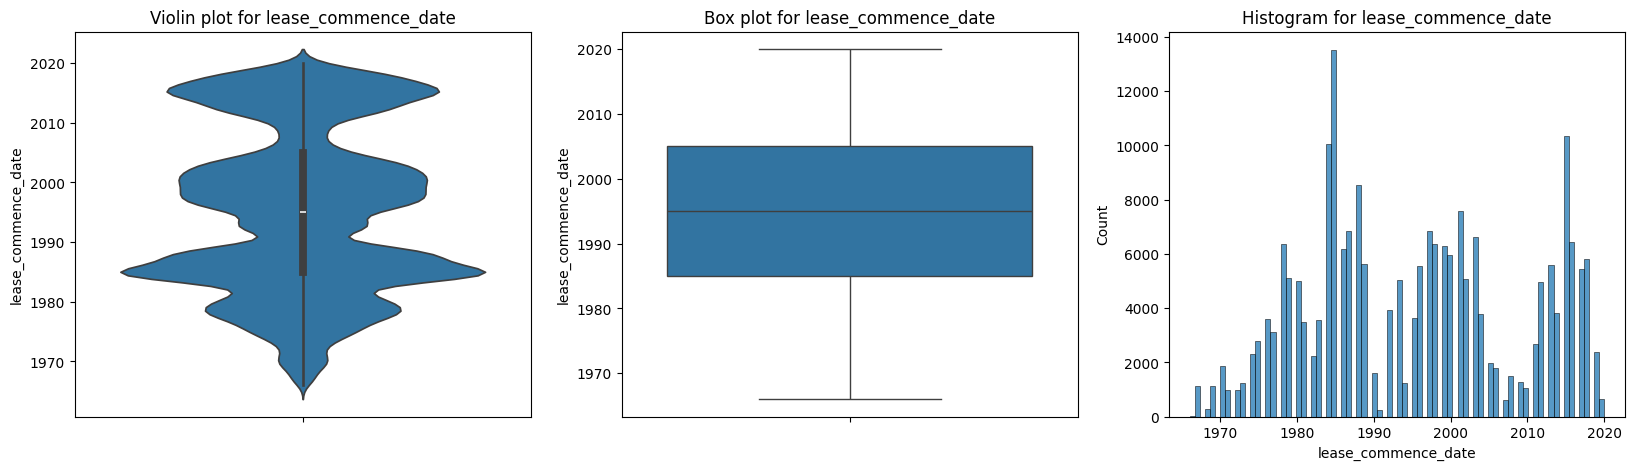

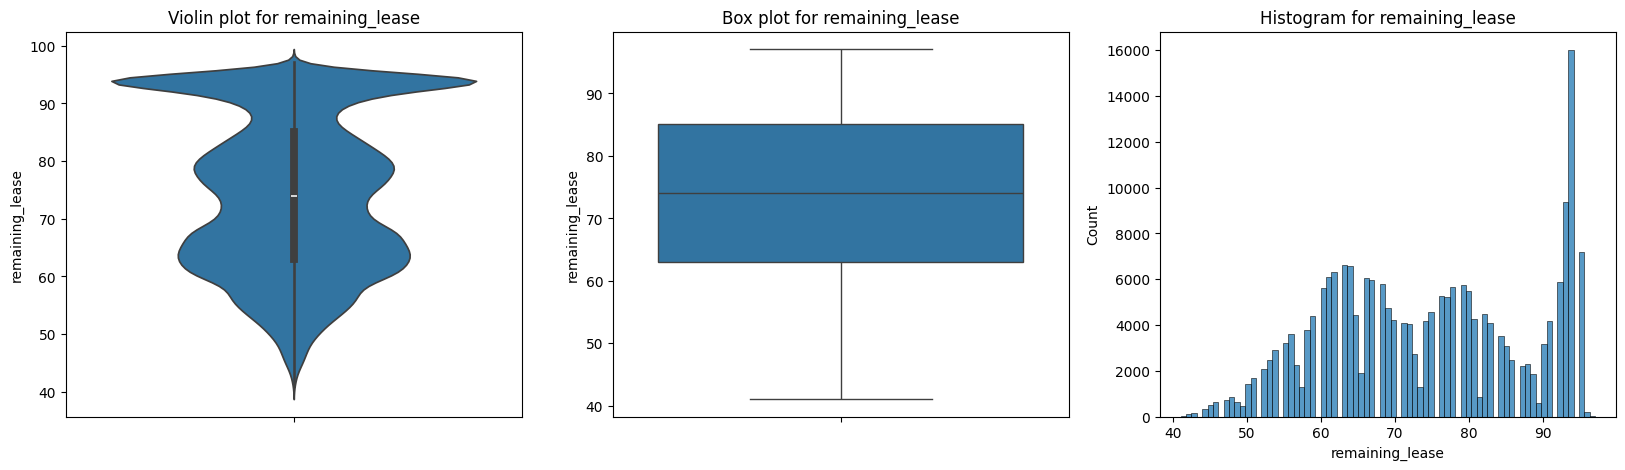

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot(df,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.title(f"Violin plot for {col}")
    sns.violinplot(df[col])

    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.title(f"Box plot for {col}")

    plt.subplot(1,3,3)
    sns.histplot(df[col])
    plt.title(f"Histogram for {col}")
    plt.show()

for i in ['floor_area_sqm','resale_price','lease_commence_date','remaining_lease']:
    plot(df,i)

In [ ]:
from scipy.stats import skew

for i in ['floor_area_sqm','resale_price','lease_commence_date','remaining_lease']:
    print(f"{i} : {skew(df[i])}")

floor_area_sqm : 0.265037894024818
resale_price : 1.0117960263658308
lease_commence_date : 0.13151792796392134
remaining_lease : 0.0032206857286640727


# **Encoding categorical columns**

In [ ]:
t = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

flat_le = LabelEncoder()
storey_le = LabelEncoder()

t['flat_type'] = flat_le.fit_transform(t['flat_type'])
t['storey_range'] = storey_le.fit_transform(t['storey_range'])

ohe = OneHotEncoder()

towns = ohe.fit_transform(t[['town']]).toarray()
c = pd.concat([t,pd.DataFrame(towns,columns=ohe.get_feature_names_out())],axis=1)
c.drop(['town'],axis=1,inplace=True)
c

,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,2,2,60.0,1986,70.00,255000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,68.0,1981,65.00,275000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,69.0,1980,64.00,285000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,68.0,1979,63.00,290000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2,68.0,1980,64.00,290000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222016,5,1,146.0,1988,63.01,865000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222017,5,3,145.0,1988,63.01,880000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222018,5,0,146.0,1985,60.03,770000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222019,5,1,146.0,1985,60.02,800000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Model Training**

In [ ]:
X = c.drop(['resale_price'],axis=1)
y = c['resale_price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import sklearn

sklearn.__version__

'1.2.2'

In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

models = [RandomForestRegressor(n_jobs=-1),DecisionTreeRegressor(),XGBRegressor(n_jobs=-1)]

for model in models:
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print(f"------------------{type(model).__name__}------------------")
    print("Train RMSE:",mean_squared_error(y_train,train_pred,squared=False))
    print("Train R2:",r2_score(y_train,train_pred))
    print("Test RMSE:",mean_squared_error(y_test,test_pred,squared=False))
    print("Test R2:",r2_score(y_test,test_pred))

------------------RandomForestRegressor------------------
Train RMSE: 16283.868004842197
Train R2: 0.9907897696501909
Test RMSE: 35887.434963027124
Test R2: 0.9554872387600015


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------------------DecisionTreeRegressor------------------
Train RMSE: 11068.415438259879
Train R2: 0.9957447385571603
Test RMSE: 45780.18231853419
Test R2: 0.9275639542392256


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------------------XGBRegressor------------------
Train RMSE: 38109.41007673764
Train R2: 0.9495548058917676
Test RMSE: 39759.68765226983
Test R2: 0.9453631533092681


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rfr = RandomForestRegressor()
rfr_para = {'n_estimators': [100,200,300,400,500],
          'max_depth': [50,60,70,80],
          'criterion':['squared_error'],
          'min_samples_split':[8,9,10,11],
          'min_samples_leaf':[1,2,3,4],
          'max_features':['sqrt', 'log2', None],
          }

rfr_grid = RandomizedSearchCV(rfr,rfr_para,cv=5,n_iter=10,n_jobs=-1,verbose=2)
rfr_grid.fit(X_train,y_train)
print("Best Parameters:", rfr_grid.best_params_)
print("Best Score:", rfr_grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 80, 'criterion': 'squared_error'}
Best Score: 0.9549750532964476


In [ ]:
rfr_grid.best_estimator_

RandomForestRegressor(max_depth=80, max_features=None, min_samples_split=8,
                      n_estimators=300)

In [ ]:
55+99+45

199

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

model = RandomForestRegressor(n_estimators=300,max_depth=80,criterion='squared_error',min_samples_split=8,min_samples_leaf=1,max_features=None)
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"------------------{type(model).__name__}------------------")
print("Train RMSE:",mean_squared_error(y_train,train_pred,squared=False))
print("Train R2:",r2_score(y_train,train_pred))
print("Test RMSE:",mean_squared_error(y_test,test_pred,squared=False))
print("Test R2:",r2_score(y_test,test_pred))

------------------RandomForestRegressor------------------
Train RMSE: 23363.665622382716
Train R2: 0.9810400446845172
Test RMSE: 35312.21510934562
Test R2: 0.9569027438164424


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model,X,y,cv=5)
print(score)
print(score.mean())

[0.91839086 0.93604919 0.91217227 0.91907509 0.86989436]
0.9111163550347093


# **Saving Model**

In [ ]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(model,f)

with open('flat_le.pkl','wb') as f:
    pickle.dump(flat_le,f)

with open('storey_le.pkl','wb') as f:
    pickle.dump(storey_le,f)

with open('town_ohe.pkl','wb') as f:
    pickle.dump(ohe,f)